<a href="https://colab.research.google.com/github/niteshavagabond/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [172]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [173]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction - Nitesh Verma/data_cardiovascular_risk.csv')

In [175]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [176]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [177]:
df.shape

(3390, 17)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [179]:
# droping irrelevant columns from dataset
df.drop(['id','education'], axis=1, inplace=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [181]:
df.isna().sum().sum()

423

In [182]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
1,sex,object,0,0.00,2,"[F, M]"
2,is_smoking,object,0,0.00,2,"[YES, NO]"
3,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
4,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
5,prevalentStroke,int64,0,0.00,2,"[0, 1]"
6,prevalentHyp,int64,0,0.00,2,"[0, 1]"
7,diabetes,int64,0,0.00,2,"[0, 1]"
8,totChol,float64,38,1.12,240,"[221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238..."
9,sysBP,float64,0,0.00,226,"[148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232..."


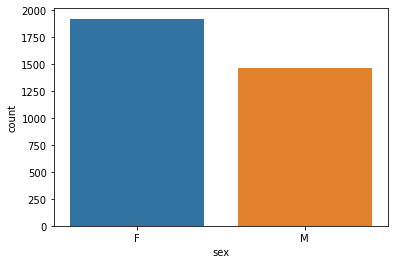

In [183]:
sns.countplot(df['sex'])

In [184]:
df['sex'].replace({'F':2,'M':1},inplace=True)

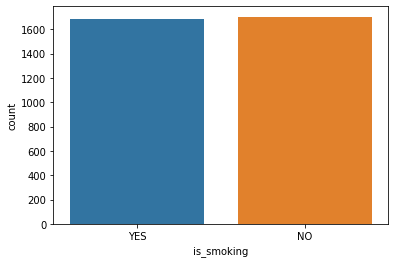

In [185]:
sns.countplot(df['is_smoking'])

In [186]:
df['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

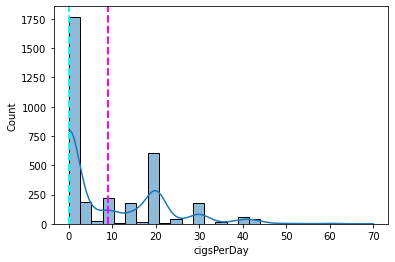

In [187]:
ax = sns.histplot(df['cigsPerDay'],kde=True)
ax.axvline(df['cigsPerDay'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['cigsPerDay'].median(), color='cyan', linestyle='dashed', linewidth=2)

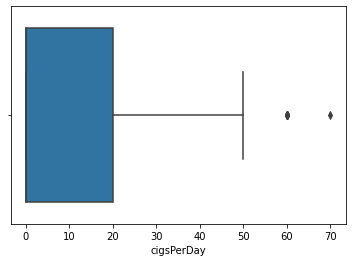

In [188]:
sns.boxplot(df['cigsPerDay'])

In [189]:
df.drop(df.index[df['cigsPerDay']>50],inplace=True)

In [190]:
df['cigsPerDay'].isna().sum()

22

In [191]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

0.0    3237
1.0     100
Name: BPMeds, dtype: int64

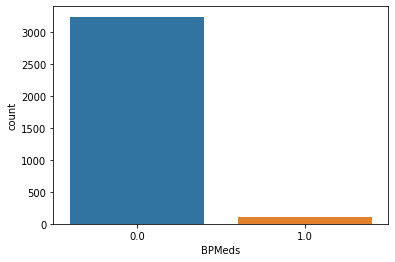

In [192]:
sns.countplot(df['BPMeds'])
df['BPMeds'].value_counts()

In [193]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0]).astype('int64')

In [194]:
df['BPMeds'].isna().sum()

0

0    3359
1      22
Name: prevalentStroke, dtype: int64

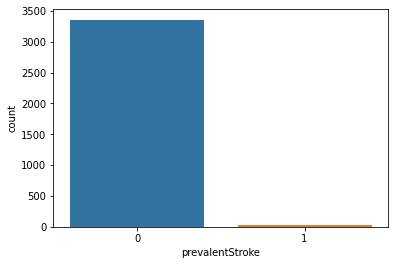

In [195]:
sns.countplot(df['prevalentStroke'])
df['prevalentStroke'].value_counts()

0    2316
1    1065
Name: prevalentHyp, dtype: int64

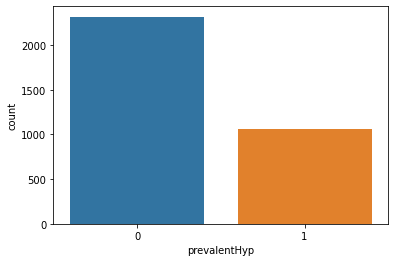

In [196]:
sns.countplot(df['prevalentHyp'])
df['prevalentHyp'].value_counts()

0    3294
1      87
Name: diabetes, dtype: int64

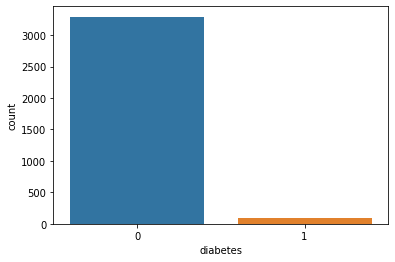

In [197]:
sns.countplot(df['diabetes'])
df['diabetes'].value_counts()

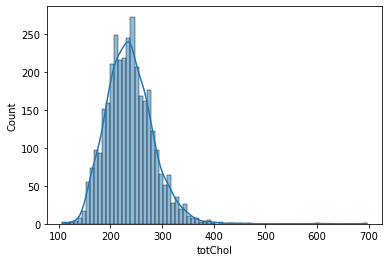

In [198]:
sns.histplot(df['totChol'],kde=True)

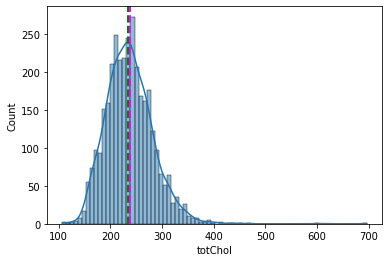

In [199]:
ax = sns.histplot(df['totChol'],kde=True)
ax.axvline(df['totChol'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['totChol'].median(), color='green', linestyle='dashed', linewidth=2)

In [200]:
df.totChol =df.totChol.fillna(df.totChol.median())

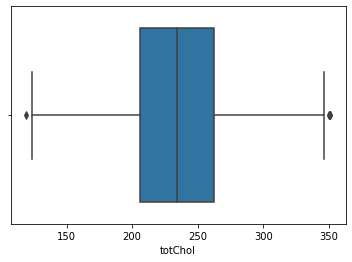

In [213]:
sns.boxplot(df['totChol'])

In [212]:
iqr_chol = np.percentile(df['totChol'],75) - np.percentile(df['totChol'],25)
upper_fence_chol = np.percentile(df['totChol'],75) + (1.5*iqr_chol)
lower_fence_chol = np.percentile(df['totChol'],25) - (1.5*iqr_chol)
print(iqr_chol)
print(upper_fence_chol)
print(lower_fence_chol)

56.0
346.0
122.0


In [211]:
df.drop(df.index[df['totChol']>351],inplace=True)
df.drop(df.index[df['totChol']<119],inplace=True)

In [151]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3367.000000,3380.000000,3078.000000,3381.000000
mean,49.543035,8.930039,0.029577,0.006507,0.314996,0.025732,237.014789,132.593316,82.874889,25.793499,75.977811,82.096491,0.150547
std,8.589849,11.546107,0.169442,0.080415,0.464583,0.158358,45.024941,22.302438,12.022637,4.117532,11.974736,24.273884,0.357660
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.015000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,50.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3381 non-null   int64  
 1   sex              3381 non-null   object 
 2   is_smoking       3381 non-null   object 
 3   cigsPerDay       3381 non-null   float64
 4   BPMeds           3381 non-null   float64
 5   prevalentStroke  3381 non-null   int64  
 6   prevalentHyp     3381 non-null   int64  
 7   diabetes         3381 non-null   int64  
 8   totChol          3381 non-null   float64
 9   sysBP            3381 non-null   float64
 10  diaBP            3381 non-null   float64
 11  BMI              3367 non-null   float64
 12  heartRate        3380 non-null   float64
 13  glucose          3078 non-null   float64
 14  TenYearCHD       3381 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 551.7+ KB


In [12]:
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3)

In [13]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,map
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,106.000
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,121.333
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,86.000
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,111.333
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,102.167


In [14]:
# we are going to find out, how many duplicate rows are their.
df[df.duplicated()].shape

(0, 16)

In [15]:
num_columns = df.describe().columns
num_columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'map'],
      dtype='object')

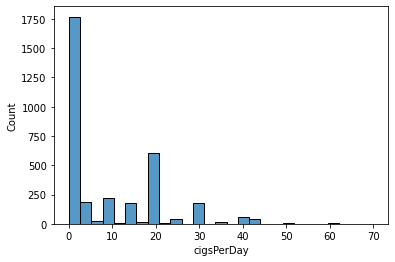

In [16]:
sns.histplot(df['cigsPerDay'])

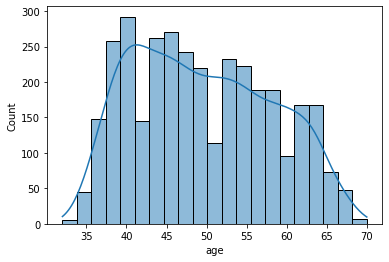

In [17]:
sns.histplot(df['age'],kde=True)

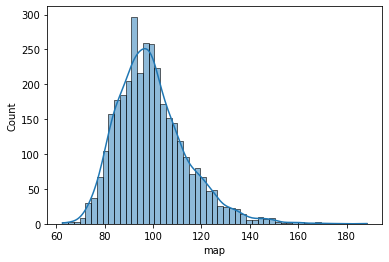

In [18]:
sns.histplot(df['map'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


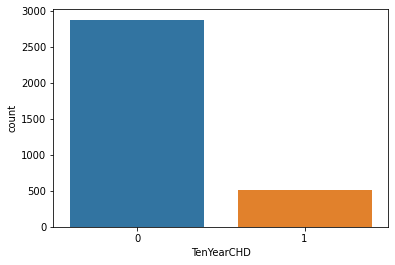

In [19]:
sns.countplot(df['TenYearCHD'])

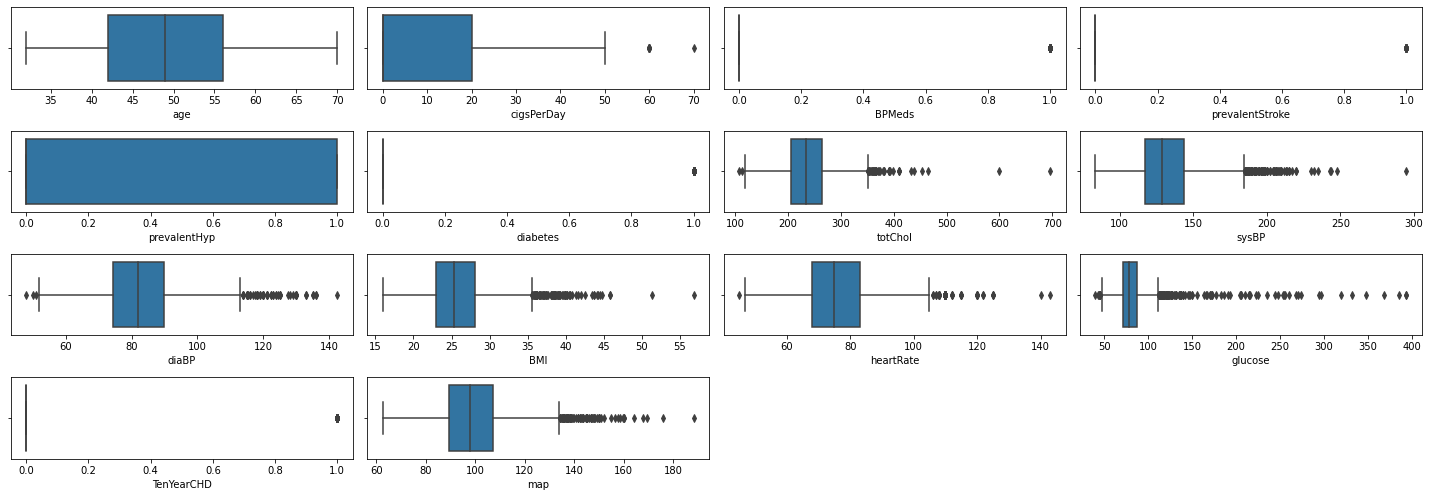

In [20]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()